In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
# plt.style.use('./deeplearning.mplstyle')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
RANDOM_STATE = 55
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

ModuleNotFoundError: No module named 'pandas'

In [ ]:
def normalize(x):
    mu = np.mean(x)
    std = np.std(x)
    x = (x-mu)/std
    
    return x

In [ ]:
path = "/kaggle/input/heart-failure-prediction/heart.csv"
df = pd.read_csv(path)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
columns = [
    "Sex",
    "ChestPainType",
    "RestingECG",
     "ExerciseAngina",
    "ST_Slope"
]
df = pd.get_dummies(df, prefix = columns  , columns = columns , dtype = float)

In [ ]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
target = df["HeartDisease"]
features = df.drop("HeartDisease", axis = 1)

In [ ]:
len(features.columns)

20

In [ ]:
X_train , X_val, y_train, y_val = train_test_split(features, target, train_size = 0.8)

In [ ]:
X_train_norm = normalize(np.array(X_train))
X_val_norm = normalize(np.array(X_val))

In [ ]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.

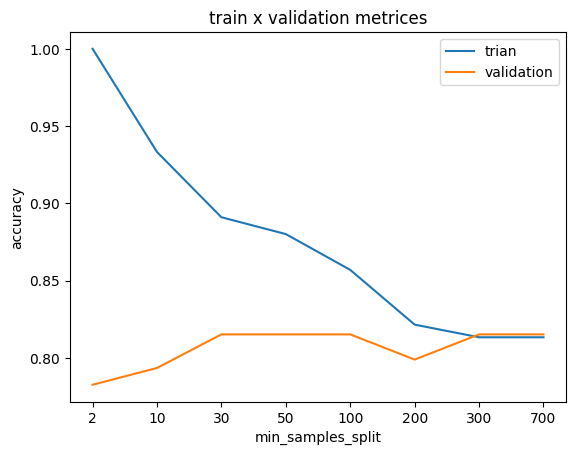

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split = min_samples).fit(X_train_norm, y_train)
    train_pred = model.predict(X_train_norm)
    val_pred = model.predict(X_val_norm)
    accuracy_list_train.append(accuracy_score(train_pred, y_train))
    accuracy_list_val.append(accuracy_score(val_pred, y_val))
    
    
plt.title("train x validation metrices")
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(["trian", "validation"])

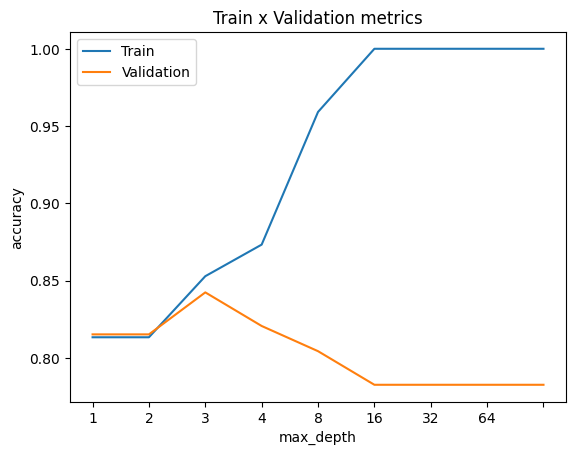

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [ ]:
max_depth = 4
min_samples_split = 50

In [ ]:
decision_tree_model = DecisionTreeClassifier(max_depth = 4, min_samples_split = 50)
decision_tree_model.fit(X_train_norm, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=50)

In [ ]:
prediction = decision_tree_model.predict(X_val_norm)

In [ ]:
print(f"Accuracy is {accuracy_score(prediction, y_val)}")

Accuracy is 0.8152173913043478


In [ ]:
#Now lets try Randomforest 
n_estimators_list = [10,50,100,500]

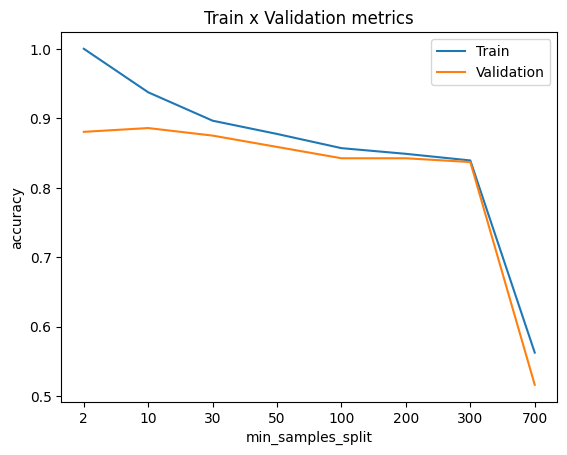

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

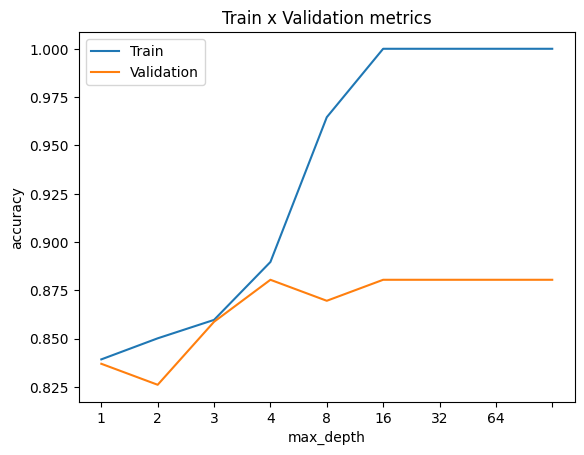

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

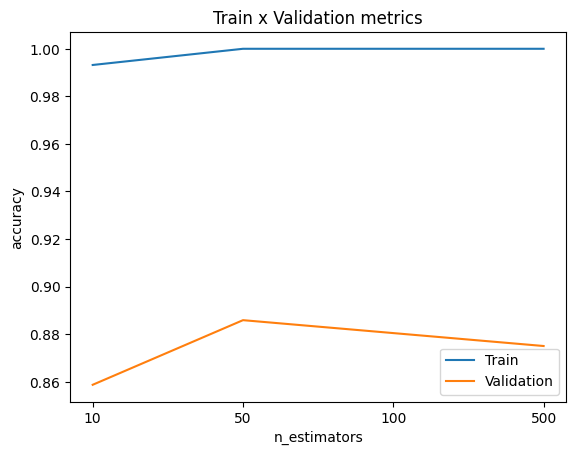

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [ ]:
"""max_depht = 4
min_samples_split = 10
n_estimators = 100"""

'max_depht = 4\nmin_samples_split = 10\nn_estimators = 100'

In [ ]:
#lets fit randomforest with above parameters
random_forest_model = RandomForestClassifier(max_depth = 16, 
                                            min_samples_split = 10,
                                            n_estimators = 100).fit(X_train_norm, y_train)

In [ ]:
predictions_train = random_forest_model.predict(X_train_norm)

In [ ]:
print("training accuracy is {}".format(accuracy_score(predictions_train, y_train)))

training accuracy is 0.9346049046321526


In [ ]:
predictions_val = random_forest_model.predict(X_val_norm)

In [ ]:
print(f"accuracy is {accuracy_score(predictions_val, y_val)}")

accuracy is 0.8804347826086957


In [ ]:
#lets use XGBoost model 
xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1, verbosity = 1)
xgb_model.fit(X_train_norm, y_train, eval_set = [(X_val_norm, y_val)], early_stopping_rounds = 10)

[0]	validation_0-logloss:0.64095
[1]	validation_0-logloss:0.59652
[2]	validation_0-logloss:0.56084
[3]	validation_0-logloss:0.53138
[4]	validation_0-logloss:0.50489
[5]	validation_0-logloss:0.48208
[6]	validation_0-logloss:0.46630
[7]	validation_0-logloss:0.45124
[8]	validation_0-logloss:0.43823
[9]	validation_0-logloss:0.42582
[10]	validation_0-logloss:0.41713
[11]	validation_0-logloss:0.40719
[12]	validation_0-logloss:0.39879
[13]	validation_0-logloss:0.39136
[14]	validation_0-logloss:0.38497
[15]	validation_0-logloss:0.38026
[16]	validation_0-logloss:0.37430
[17]	validation_0-logloss:0.37071
[18]	validation_0-logloss:0.36735
[19]	validation_0-logloss:0.36698
[20]	validation_0-logloss:0.36546
[21]	validation_0-logloss:0.36369
[22]	validation_0-logloss:0.36359
[23]	validation_0-logloss:0.36435
[24]	validation_0-logloss:0.36159
[25]	validation_0-logloss:0.35956
[26]	validation_0-logloss:0.35817
[27]	validation_0-logloss:0.35712
[28]	validation_0-logloss:0.35704
[29]	validation_0-loglos

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[38]	validation_0-logloss:0.35762
[39]	validation_0-logloss:0.35628


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
predictions = xgb_model.predict(X_val_norm)

In [ ]:
print("accuracy of xgb model is {}".format(accuracy_score(predictions, y_val)))

accuracy of xgb model is 0.8478260869565217
